In [1]:
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import loadtxt
import numpy.linalg as la
import random

In [307]:
#Problem 1
data1 = scipy.io.loadmat('/Users/Michael/Desktop/Spring2017/CS289/HW7/hw7_data/mnist_data/images.mat')
images = data1['images']
images = images.reshape(784,60000).transpose()

In [317]:
#KNN
def update_y(data, mu):
    y = np.zeros((len(data)))
    for i in range(len(data)):
        distance = la.norm(mu-data[i], axis=1)
        y[i] = int(distance.argmin(axis=0))
    return y

In [280]:
def update_mu(data, mu, y):
    return np.array([data[y==k].mean(axis=0) for k in range(np.shape(mu)[0])])

In [300]:
def K_Mean(data, k, steps):
    index = np.random.randint(len(data),size = k)
    mu = data[index]
    y = update_y(data, mu)
    for i in range(steps):
        old_y = y
        mu = update_mu(data, mu, y)
        y = update_y(data, mu)
        if (y.all() == old_y.all()):
            break
    return y, mu

In [318]:
#i
#5 Clusters
Label_5, Center_5 = K_Mean(images, 5, 100)

In [337]:
#10 Clusters
Label_10, Center_10 = K_Mean(images, 10, 200)

In [324]:
#20 Clusters
Label_20, Center_20 = K_Mean(images, 20, 200)

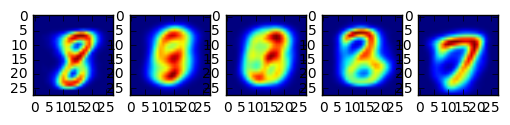

In [334]:
#ii
#5 Clusters
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(Center_5[i].reshape(28,28))
plt.show()

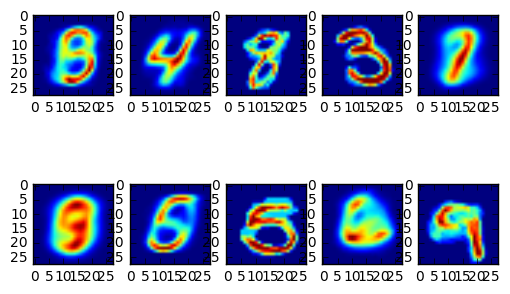

In [338]:
#10 Clusters
for i in range(10):
    p=plt.subplot(2,5,i+1)
    p.imshow(Center_10[i].reshape(28,28))
plt.show()

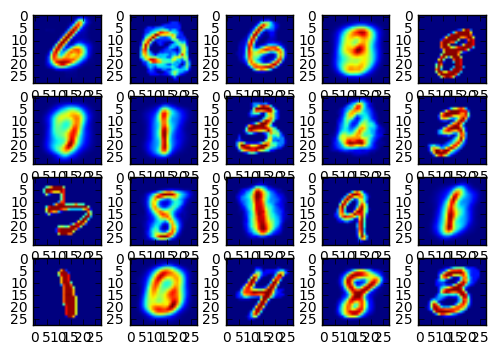

In [336]:
#20 Clusters
for i in range(20):
    p=plt.subplot(4,5,i+1)
    p.imshow(Center_20[i].reshape(28,28))
plt.show()

In [27]:
#Problem 2
from skimage.io import imread
face = imread('/Users/Michael/Desktop/Spring2017/CS289/HW7/hw7_data/low-rank_data/face.jpg')
sky = imread('/Users/Michael/Desktop/Spring2017/CS289/HW7/hw7_data/low-rank_data/sky.jpg')

In [82]:
#MSE function
def mse(A, B):
    difference = np.subtract(A, B)
    norm = math.sqrt(np.sum(np.multiply(difference, difference)))
    return norm

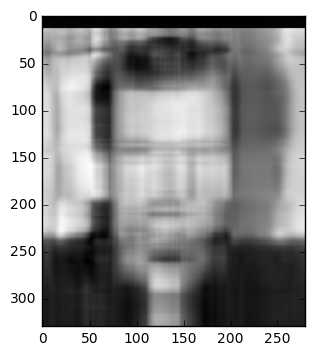

In [74]:
#Face
#a
#Rank5
svd = la.svd(face)
D5 = np.zeros((np.shape(face)[0],np.shape(face)[1]))
for i in range(5):
    D5[i,i] = svd[1][i]
rank5 = (svd[0].dot(D5)).dot(svd[2])

plt.imshow(rank5,cmap='gray')
plt.show()

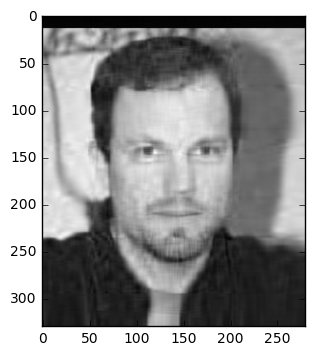

In [75]:
#Rank20
D20 = np.zeros((np.shape(face)[0],np.shape(face)[1]))
for i in range(20):
    D20[i,i] = svd[1][i]
rank20 = (svd[0].dot(D20)).dot(svd[2])

plt.imshow(rank20,cmap='gray')
plt.show()

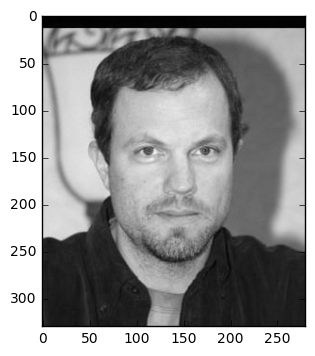

In [76]:
#Rank100
D100 = np.zeros((np.shape(face)[0],np.shape(face)[1]))
for i in range(100):
    D100[i,i] = svd[1][i]
rank100 = (svd[0].dot(D100)).dot(svd[2])

plt.imshow(rank100,cmap='gray')
plt.show()

In [86]:
#b
range_r=np.arange(100)+1
MSE=list()
for i in range(100):
    D = np.zeros((np.shape(face)[0],np.shape(face)[1]))
    for j in range(i):
        D[j,j] = svd[1][j]
    rank = (svd[0].dot(D)).dot(svd[2])
    MSE.append(mse(face, rank))

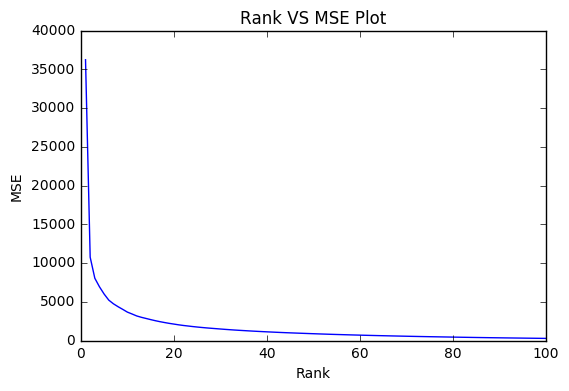

In [89]:
plt.plot(range_r, MSE)
plt.xlabel("Rank")
plt.ylabel("MSE")
plt.title("Rank VS MSE Plot")
plt.show()

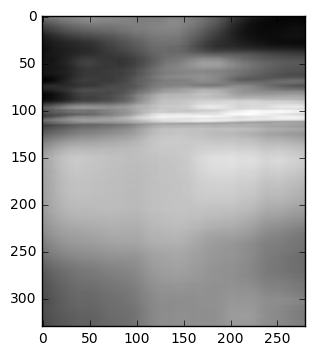

In [77]:
#Sky
#c
#Rank5
svd2 = la.svd(sky)
D5 = np.zeros((np.shape(sky)[0],np.shape(sky)[1]))
for i in range(5):
    D5[i,i] = svd2[1][i]
rank5 = (svd2[0].dot(D5)).dot(svd2[2])

plt.imshow(rank5,cmap='gray')
plt.show()

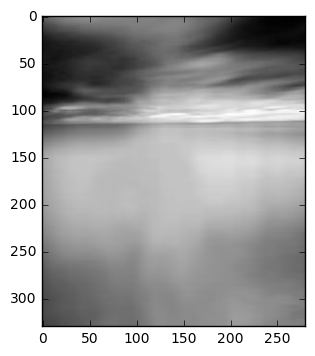

In [80]:
#Rank20
D20 = np.zeros((np.shape(sky)[0],np.shape(sky)[1]))
for i in range(20):
    D20[i,i] = svd2[1][i]
rank20 = (svd2[0].dot(D20)).dot(svd2[2])

plt.imshow(rank20,cmap='gray')
plt.show()

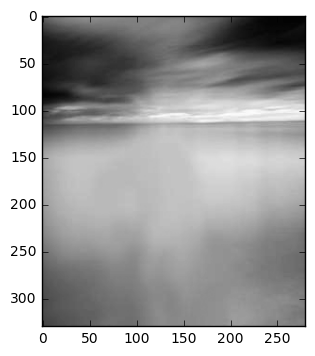

In [81]:
#Rank100
D100 = np.zeros((np.shape(sky)[0],np.shape(sky)[1]))
for i in range(100):
    D100[i,i] = svd2[1][i]
rank100 = (svd2[0].dot(D100)).dot(svd2[2])

plt.imshow(rank100,cmap='gray')
plt.show()

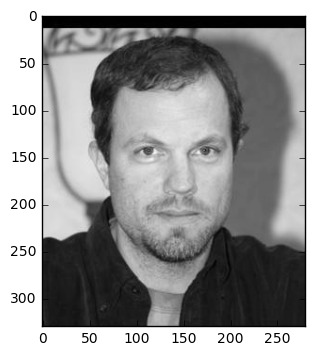

In [100]:
#d
#Face
#Original
plt.imshow(face,cmap="gray")
plt.show()

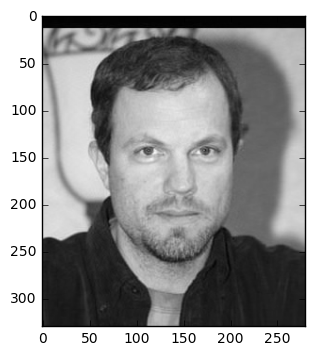

In [108]:
#Rank80
D80 = np.zeros((np.shape(face)[0],np.shape(face)[1]))
for i in range(80):
    D80[i,i] = svd[1][i]
rank80 = (svd[0].dot(D80)).dot(svd[2])

plt.imshow(rank80,cmap='gray')
plt.show()

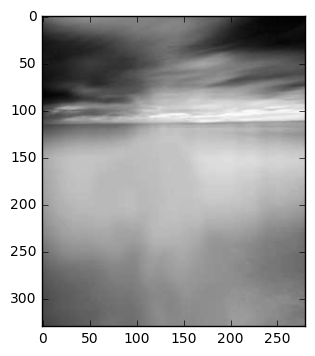

In [101]:
#Sky
#Original
plt.imshow(sky,cmap="gray")
plt.show()

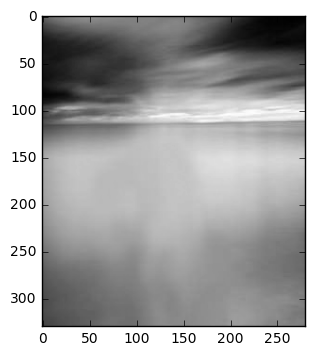

In [98]:
#Rank40
D40 = np.zeros((np.shape(sky)[0],np.shape(sky)[1]))
for i in range(40):
    D40[i,i] = svd2[1][i]
rank40 = (svd2[0].dot(D40)).dot(svd2[2])

plt.imshow(rank40,cmap='gray')
plt.show()

In [2]:
#Problem 3
data3 = scipy.io.loadmat('/Users/Michael/Desktop/Spring2017/CS289/HW7/hw7_data/joke_data/joke_train.mat')
jokes=data3['train']

validation = loadtxt('/Users/Michael/Desktop/Spring2017/CS289/HW7/hw7_data/joke_data/validation.txt', delimiter=",", unpack=False, dtype=int)
query = loadtxt('/Users/Michael/Desktop/Spring2017/CS289/HW7/hw7_data/joke_data/query.txt', delimiter=",", unpack=False, dtype=int)

In [4]:
#a
jokes1 = np.nan_to_num(jokes)
U, D, Vt = la.svd(jokes1)

In [548]:
range_d = [2,5,10,20]
l=len(validation)
MSE_train = list()
MSE_validation = list()
accuracy = list()
non_nan = (~np.isnan(jokes)*1)
for d in range_d:
    D_hat = np.zeros((d,d))
    for i in range(d):
        D_hat[i,i] = D[i]
    S = ((U[:,0:d]).dot(D_hat)).dot(Vt[0:d,:])
    Validation_S = S.copy()
    Validation_S[Validation_S > 0] = 1
    Validation_S[Validation_S <= 0] = 0
    S_nonnan = np.multiply(S, non_nan)
    MSE_train.append(np.sum(np.multiply(S_nonnan-jokes1,S_nonnan-jokes1)))
    count = list()
    error = list()
    for j in range(l):
        count.append(Validation_S[validation[j,0]-1,validation[j,1]-1]==validation[j,2])
        error.append((S[validation[j,0]-1,validation[j,1]-1]-validation[j,2])**2)
    accuracy.append((np.asarray(count)*1).sum()/l)
    MSE_validation.append(np.sum(error))

In [549]:
MSE_train

[18441623.017881583,
 16333384.420196826,
 14165432.757999642,
 11304007.439729331]

In [550]:
MSE_validation

[5677.1226255987622,
 7388.0440567998012,
 8520.3438179966724,
 8911.9070162797871]

In [546]:
accuracy

[0.70514905149051488,
 0.71544715447154472,
 0.71653116531165306,
 0.68590785907859075]

In [37]:
#b
def mini_u(ui, vj, lamb):
    k = np.shape(vj)[1]
    sum_vj = np.zeros((k,k))
    for j in range(k):
        sum_vj = sum_vj + (vj[j,:]).reshape(k,1).dot((vj[j,:]).reshape(1,k))
    for i in range(len(ui)):
        sum_Rij_vj = np.zeros((k,1))
        for j in range(len(vj)):    
            sum_Rij_vj = sum_Rij_vj + jokes1[i,j]*(vj[j,:].reshape(k,1)) 
        ui[i] = (la.inv(sum_vj + lamb*np.eye(k)).dot(sum_Rij_vj)).reshape(k,)
    return ui

In [34]:
def mini_v(ui, vj, lamb):
    l = np.shape(vj)[1]
    sum_ui = np.zeros((l,l))
    for i in range(len(ui)):
        sum_ui = sum_ui + ((ui[i,:]).reshape(l,1)).dot((ui[i,:]).reshape(1,l))      
    for j in range(len(vj)):
        sum_Rij_ui = np.zeros((l,1))      
        for i in range(len(ui)):
            sum_Rij_ui = sum_Rij_ui + jokes1[i,j]*(ui[i,:].reshape(l,1))
        vj[j] = (la.inv(sum_ui + lamb*np.eye(l)).dot(sum_Rij_ui)).reshape(l,)
    return vj

In [42]:
l=len(validation)
lambda_range = [10, 20, 50, 100]
accuracy = list()
MSE_train = list()
MSE_validation = list()
new_U = np.random.rand(len(jokes1),100)
new_V = np.random.rand(100,100)
for lamb in lambda_range:
    Ui = new_U
    Vj = new_V
    for i in range(20):
        Ui = mini_u(Ui, Vj, lamb)
        Vj = mini_v(Ui, Vj, lamb)
    S = Ui.dot(Vj.transpose())
    new_m = S.copy()
    S_nonnan = np.multiply(S, non_nan)
    MSE_train.append(np.sum(np.multiply(S_nonnan-jokes1,S_nonnan-jokes1)))
    new_m[new_m>0] = 1
    new_m[new_m<=0] = 0
    count = list()
    error = list()
    for j in range(l):
        count.append(new_m[validation[j,0]-1,validation[j,1]-1]==validation[j,2])
        error.append((S[validation[j,0]-1,validation[j,1]-1]-validation[j,2])**2)
    MSE_validation.append(np.sum(error))
    accuracy.append((np.asarray(count)*1).sum()/l)

In [43]:
accuracy

[0.70135501355013552,
 0.72926829268292681,
 0.72926829268292681,
 0.72764227642276424]

In [44]:
MSE_train

[6364.0538993859636,
 36602.795838576276,
 234031.66822879421,
 936653.53823119041]

In [45]:
MSE_validation

[2085.6615576749796, 2010.556257227805, 1858.7603010783776, 1682.3133899727882]

In [520]:
#c
lamb = 20
Ui = new_U
Vj = new_V
for i in range(20):
    Ui = mini_u(Ui, Vj, lamb)
    Vj = mini_v(Ui, Vj, lamb)
    
new_m = Ui.dot(Vj.transpose())
new_m[new_m>0] = 1
new_m[new_m<=0] = 0
    
result = np.empty((len(query)))
for i in range(len(query)):
    result[i] = new_m[query[i,1]-1,query[i,2]-1]

data_len = (np.arange(len(query))+1)

In [521]:
#Save for Kaggle competition
np.savetxt("/Users/Michael/Desktop/Spring2017/CS289/HW7/kaggle_submission.txt",np.c_[data_len,result], fmt="%i",delimiter=",",header="Id,Category",comments="")